In [1]:
%pip install -r requirements.txt --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(10,8)})
sns.set_palette("bright")

Note: you may need to restart the kernel to use updated packages.


In [141]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

data_home = "./Data/"


def load_dataset_train_test():
    data_train = fetch_20newsgroups(
        data_home=data_home,
        subset="train",
        shuffle=True,
        random_state=42,
        remove=('headers', 'footers', 'quotes')
    )

    data_test = fetch_20newsgroups(
        data_home=data_home,
        subset="test",
        shuffle=True,
        random_state=42,
        remove=('headers', 'footers', 'quotes')
    )

    target_names = data_train.target_names
    y_train, y_test = data_train.target, data_test.target

    vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words="english")

    X_train = vectorizer.fit_transform(data_train.data)
    X_test = vectorizer.transform(data_test.data)
    feature_names = vectorizer.get_feature_names_out()

    return X_train, X_test, y_train, y_test, feature_names, target_names


def load_dataset():
    data = fetch_20newsgroups(
        data_home=data_home, subset="all", shuffle=False, remove=('headers', 'footers', 'quotes')
    )
    y = data.target
    target_names = data.target_names
    vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words="english")
    X = vectorizer.fit_transform(data.data)
    feature_names = vectorizer.get_feature_names_out()
    return X, y, feature_names, target_names

def twenty_newsgroup_to_csv(save_target: bool = False):
    data = fetch_20newsgroups(
        data_home=data_home, subset="all", shuffle=False, remove=('headers', 'footers', 'quotes')
    )

    if not save_target:
        df = pd.DataFrame([data.data]).T
        df.columns = ['text']
        df.to_csv(data_home + '20_newsgroup.csv', index=False)
        return 
        
    df = pd.DataFrame([data.data, data.target.tolist()]).T
    df.columns = ['text', 'target']

    targets = pd.DataFrame( data.target_names)
    targets.columns=['title']

    out = pd.merge(df, targets, left_on='target', right_index=True)
    out.to_csv(data_home + '20_newsgroup.csv', index=False)
    
twenty_newsgroup_to_csv(save_target=False)

In [89]:
# X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset()
X, y, feature_names, target_names = load_dataset()

In [90]:
target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# LSA (SVD)

In [91]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20)
lsa = svd.fit_transform(X)
lsa_df = pd.DataFrame(svd.components_, index=[f"topic_{i}" for i in range(1, 21)], columns=feature_names).T
lsa_df

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20
00,0.028243,-0.044380,-0.049207,0.069515,0.036335,-0.089465,-0.255418,0.044117,-0.133815,0.088895,0.010383,0.189721,0.209685,0.309543,0.208137,0.266407,-0.194837,-0.107181,0.084942,-0.026411
000,0.023307,0.010374,-0.041429,0.008936,-0.006924,-0.018946,-0.043536,0.040222,-0.064846,0.005985,0.008825,0.031572,-0.056464,0.021712,-0.028413,-0.001631,0.016182,-0.010910,0.015139,0.028006
0000,0.000388,-0.000448,-0.000293,-0.000170,0.000105,-0.000801,-0.001200,0.000383,-0.000507,0.000349,-0.000475,-0.000648,-0.000293,0.000471,-0.000904,0.000326,-0.000160,-0.000008,0.000283,0.000303
00000,0.000429,-0.001032,-0.000117,-0.000493,-0.000377,-0.001040,-0.003265,0.000103,-0.000268,-0.000308,-0.000468,-0.003610,-0.000131,0.001208,-0.004314,-0.000675,-0.000470,-0.000283,0.000011,-0.001242
0001,0.000457,-0.000528,0.000664,-0.000401,0.000484,0.000049,0.000034,0.000320,0.000030,-0.000080,-0.000137,0.000613,-0.000715,0.000942,-0.000773,-0.000359,-0.001062,0.001047,-0.001036,-0.000377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zw,0.000023,-0.000044,-0.000049,0.000061,0.000045,-0.000068,-0.000240,0.000049,-0.000063,0.000012,0.000025,0.000022,-0.000024,0.000149,0.000006,0.000115,-0.000141,0.000082,0.000169,-0.000005
zx,0.001844,-0.000349,-0.002485,0.002015,0.000860,-0.001076,0.001465,0.001215,-0.001044,0.005732,-0.002909,0.000893,-0.000743,-0.001965,-0.001917,0.001590,-0.001484,0.002552,0.005694,0.000352
zy,0.000032,-0.000060,-0.000064,0.000077,0.000057,-0.000095,-0.000321,0.000063,-0.000079,0.000010,0.000035,0.000012,-0.000034,0.000185,0.000001,0.000144,-0.000187,0.000118,0.000222,-0.000004
zyxel,0.000766,-0.001334,0.000039,0.000066,-0.000230,-0.000914,-0.001183,0.000315,-0.000074,0.000612,0.000160,-0.002062,0.001886,-0.000480,0.001388,-0.001393,0.003014,-0.001446,-0.000396,0.001535


In [92]:
def get_top_words(df, k):
    result = {}
    
    for col in df.columns:
        top_indices = df[col].nlargest(k).index.tolist() + list(reversed(df[col].nsmallest(k).index))
        formatted_entries = []
        for idx in top_indices:
            # sign = '+' if df[col][idx] >= 1e-4 else '-' if df[col][idx] <= -1e-4 else '0'
            # formatted_entries.append(f"{idx} ({sign})")
            formatted_entries.append(f"{idx} ({df[col][idx]:3.1f})")
        
        # Store in result dictionary
        result[col] = formatted_entries
    
    return pd.DataFrame(result)

lsa_top_words = get_top_words(lsa_df, 5)
display(lsa_top_words.iloc[:,:10])
display(lsa_top_words.iloc[:,10:])

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
0,don (0.2),god (0.3),god (0.5),drive (0.4),game (0.3),windows (0.4),know (0.3),edu (0.2),key (0.2),car (0.3)
1,like (0.2),people (0.2),windows (0.2),scsi (0.3),games (0.2),dos (0.2),thanks (0.3),geb (0.2),geb (0.2),bike (0.2)
2,know (0.2),jesus (0.1),jesus (0.2),god (0.2),team (0.2),file (0.1),does (0.2),dsl (0.2),pitt (0.2),good (0.1)
3,just (0.2),think (0.1),does (0.1),ide (0.2),thanks (0.1),think (0.1),don (0.2),n3jxp (0.2),edu (0.2),just (0.1)
4,people (0.2),believe (0.1),bible (0.1),card (0.1),windows (0.1),problem (0.1),just (0.1),cadre (0.2),dsl (0.2),god (0.1)
5,mf3t (0.0),dos (-0.1),car (-0.1),government (-0.1),scsi (-0.2),does (-0.1),key (-0.1),clipper (-0.1),armenians (-0.1),people (-0.1)
6,9f3w2 (0.0),card (-0.1),games (-0.1),program (-0.1),chip (-0.2),email (-0.1),edu (-0.1),god (-0.1),israel (-0.1),thanks (-0.2)
7,m9l3 (0.0),drive (-0.2),team (-0.1),key (-0.1),government (-0.2),edu (-0.2),10 (-0.1),chip (-0.2),car (-0.1),scsi (-0.2)
8,9l2 (0.0),thanks (-0.2),year (-0.1),file (-0.1),key (-0.2),mail (-0.2),god (-0.2),game (-0.2),armenian (-0.1),game (-0.2)
9,0qq (0.0),windows (-0.2),game (-0.2),windows (-0.2),drive (-0.2),thanks (-0.3),00 (-0.3),key (-0.2),00 (-0.1),drive (-0.2)


,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20
0,card (0.5),windows (0.4),don (0.3),does (0.5),window (0.3),00 (0.3),car (0.2),car (0.3),just (0.4),window (0.3)
1,video (0.2),dos (0.2),think (0.2),know (0.4),00 (0.2),file (0.3),file (0.2),com (0.2),ve (0.2),armenian (0.2)
2,monitor (0.2),car (0.2),00 (0.2),00 (0.3),use (0.1),fbi (0.2),files (0.2),israel (0.2),key (0.2),don (0.2)
3,bus (0.1),00 (0.2),people (0.2),don (0.2),thanks (0.1),koresh (0.1),mac (0.2),edu (0.2),israel (0.2),armenians (0.2)
4,does (0.1),thanks (0.2),mail (0.2),10 (0.1),sale (0.1),files (0.1),israel (0.1),window (0.1),jews (0.1),people (0.2)
5,disk (-0.1),color (-0.1),problem (-0.1),com (-0.1),ftp (-0.1),jews (-0.1),list (-0.1),just (-0.1),car (-0.1),israeli (-0.1)
6,files (-0.1),card (-0.1),armenian (-0.1),just (-0.1),scsi (-0.1),like (-0.1),scsi (-0.1),armenians (-0.1),government (-0.1),thanks (-0.1)
7,program (-0.1),space (-0.1),window (-0.2),god (-0.1),card (-0.1),space (-0.2),window (-0.2),space (-0.1),space (-0.2),space (-0.2)
8,file (-0.2),graphics (-0.1),car (-0.2),mail (-0.2),car (-0.2),windows (-0.2),00 (-0.2),armenian (-0.2),like (-0.2),file (-0.2)
9,drive (-0.3),image (-0.1),does (-0.2),thanks (-0.2),space (-0.2),israel (-0.2),space (-0.2),like (-0.2),gun (-0.2),israel (-0.2)


# pLSA

In [149]:
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA

plsa_pipeline = Pipeline(*DEFAULT_PIPELINE)

plsa_corpus = Corpus.from_csv(data_home + "20_newsgroup.csv", plsa_pipeline)
plsa_corpus

Corpus:
Number of documents: 972
Number of words:     8939

Следующий чанк может долго отрабатывать, это нормально

In [150]:
n_topics = 20
plsa = PLSA(plsa_corpus, n_topics, True)
plsa_res = plsa.fit()
# plsa_res = plsa.best_of(5)
plsa_res.topic

array([0.07033287, 0.0686559 , 0.05981967, 0.05876068, 0.05776318,
       0.05550814, 0.05513825, 0.05406546, 0.05178032, 0.04963444,
       0.04943463, 0.04794355, 0.04729744, 0.0459037 , 0.04420265,
       0.04377086, 0.04068928, 0.03515193, 0.03385638, 0.03029069])

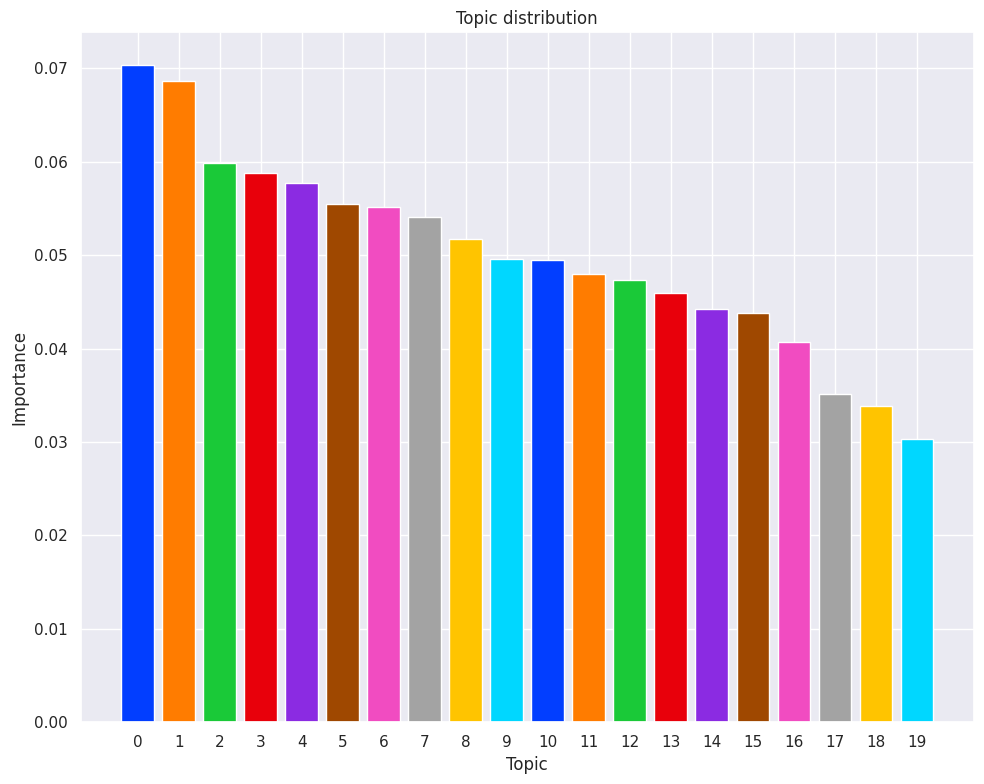

In [151]:
plsa_vis = Visualize(plsa_res)
fig, ax = plt.subplots()
plsa_vis.topics(ax)
fig.tight_layout()

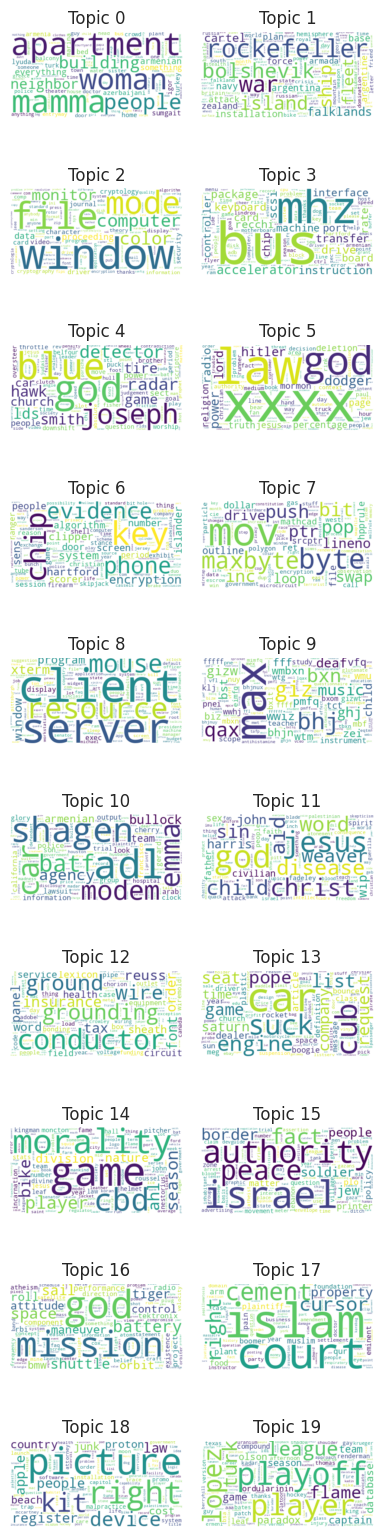

In [152]:
fig = plt.figure(figsize=(4, 16))
plsa_vis.wordclouds(fig)
plt.show()

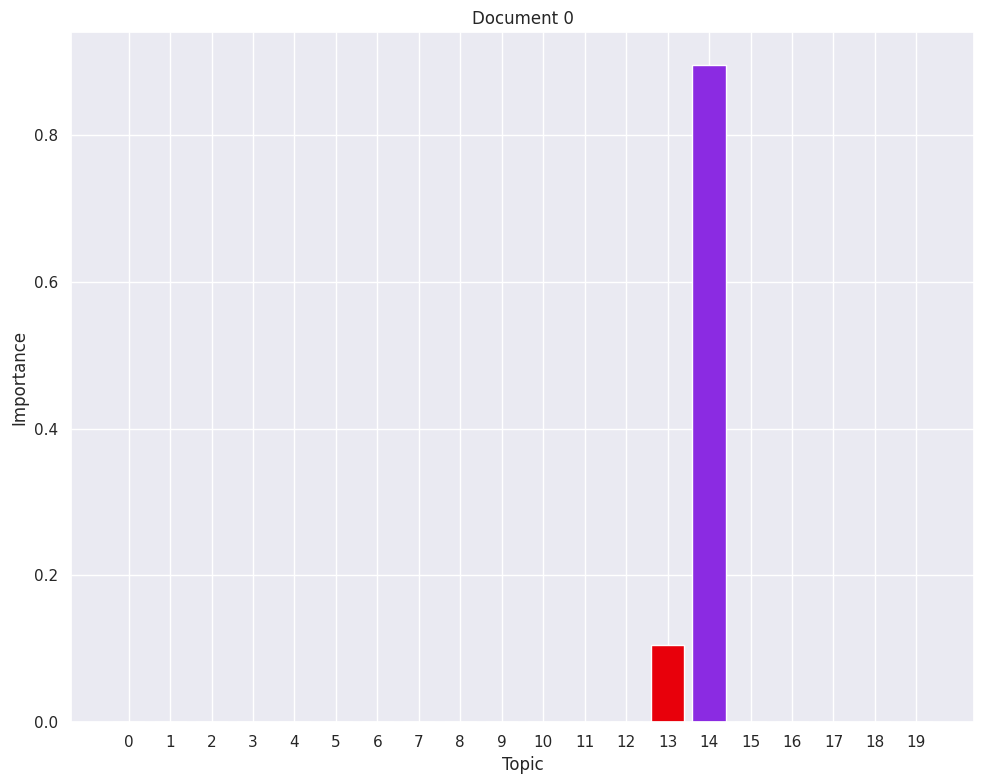

In [153]:
fig, ax = plt.subplots()
plsa_vis.topics_in_doc(0, ax)
fig.tight_layout()

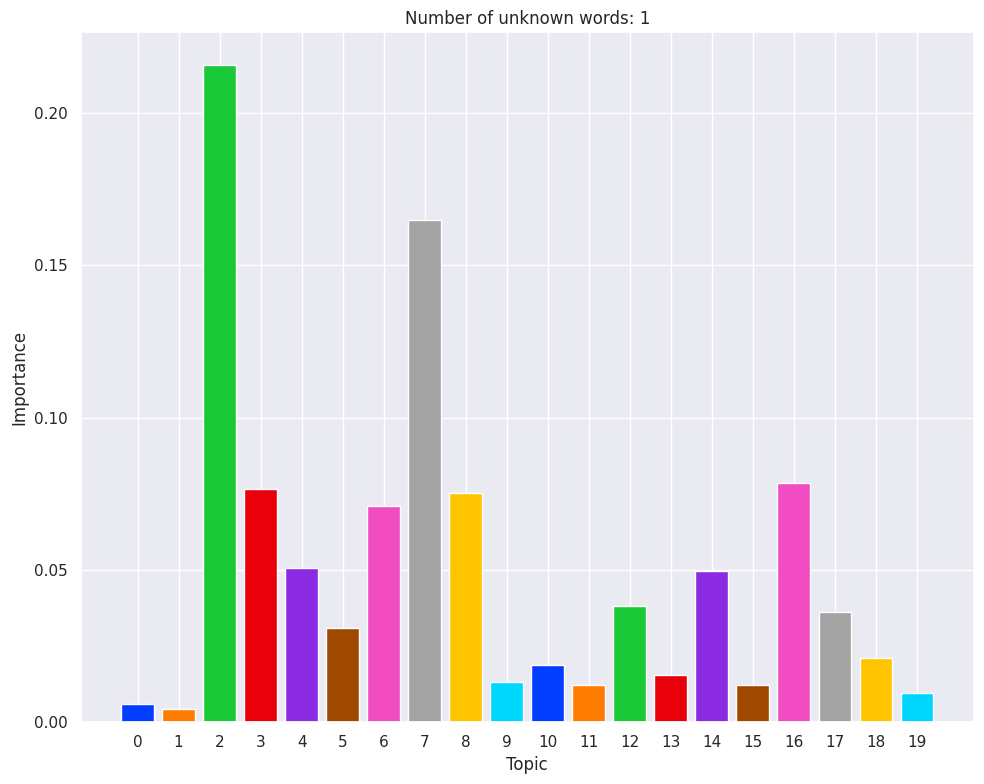

In [156]:
new_doc = (
    "Similar to a principal component analysis, the singular value decomposition "
    "If you’re familiar with this statistical method, encoding the original data set with these latent "
    "features using latent semantic analysis will minimize its dimensionality. "
    "These latent features correspond to the original text data’s subjects."
)

fig, ax = plt.subplots()
plsa_vis.prediction(new_doc, ax)
fig.tight_layout()

# Latent Dirichlet Allocation (LDA)

In [159]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(20, evaluate_every=2, n_jobs=-1, random_state=42)
lda.fit(X)

,n_components,20
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,2
,total_samples,1000000.0
,perp_tol,0.1


In [161]:
lda.perplexity(X)

np.float64(76169.93126753875)